<a href="https://colab.research.google.com/github/Ismail-therap/NLP-Project-Predicting-review-in-1-to-5-star-/blob/main/LSTM%2BCNN_Hybrid_Modelling%205%20category.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Importing libraries
import h5py as h5
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Embedding, Dropout, Activation, Reshape
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, GlobalAveragePooling1D, TimeDistributed
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [6]:

url='https://drive.google.com/file/d/1-vBpWV0H0cxX5jSeHlQIKXIiosMKwq2t/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id
data = pd.read_csv(dwn_url)

# 5 Category prediciton

In [28]:
trunc = 500

## sampling neutral review:
reviews1 = data[data["review_stars"] == 1]
reviews1 = reviews1.sample(n=trunc)

## sampling negative review:
reviews2 = data[data["review_stars"] == 2]
reviews2 = reviews2.sample(n=trunc)


## sampling positive review:
reviews3 = data[data["review_stars"] == 3]
reviews3 = reviews3.sample(n=trunc)

## sampling positive review:
reviews4 = data[data["review_stars"] == 4]
reviews4 = reviews4.sample(n=trunc)

## sampling positive review:
reviews5 = data[data["review_stars"] == 5]
reviews5 = reviews5.sample(n=trunc)

data = reviews1.append([reviews2, reviews3,reviews4,reviews5])
data.shape

(2500, 19)

In [29]:
data.shape


(2500, 19)

In [40]:

# Encoded the target column
lb=LabelEncoder()
data['sentiment'] = lb.fit_transform(data['review_stars'].values)

tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(data['text'].values)
X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X)

#Splitting the data into training and testing
y=pd.get_dummies(data['review_stars'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [49]:
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0))
model.add(LSTM(128, dropout=0, recurrent_dropout=0,return_sequences=True))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=3))
#model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
#model.add(MaxPooling1D(pool_size=3))

model.add(Flatten())
model.add(Dense(100, activation='relu'))

model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_18 (Embedding)    (None, 700, 120)          60000     
                                                                 
 spatial_dropout1d_17 (Spati  (None, 700, 120)         0         
 alDropout1D)                                                    
                                                                 
 lstm_17 (LSTM)              (None, 700, 128)          127488    
                                                                 
 conv1d_38 (Conv1D)          (None, 700, 128)          49280     
                                                                 
 max_pooling1d_37 (MaxPoolin  (None, 233, 128)         0         
 g1D)                                                            
                                                                 
 conv1d_39 (Conv1D)          (None, 233, 64)         

In [50]:
import time
start = time.time()



batch_size = 32
X_train1 = X_train[batch_size:]
y_train1 = y_train[batch_size:]
X_valid = X_train[:batch_size]
y_valid = y_train[:batch_size]


model.fit(X_train1, y_train1, validation_data=(X_valid,y_valid), epochs = 1, batch_size=batch_size, verbose = 'auto')

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)


print("Execution time: "+"{:0>2}:{:0>2}:{:05.2f}".format(int(hours),int(minutes),seconds))

54/54 [==============================] - 64s 1s/step - loss: 1.6084 - accuracy: 0.2101 - val_loss: 1.5889 - val_accuracy: 0.2812
Execution time: 00:01:24.39


In [51]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.2606
Testing Accuracy:  0.2333


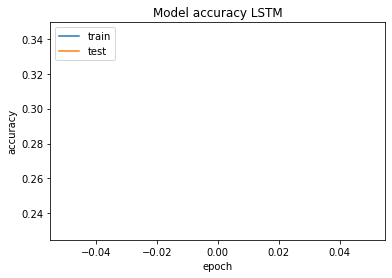

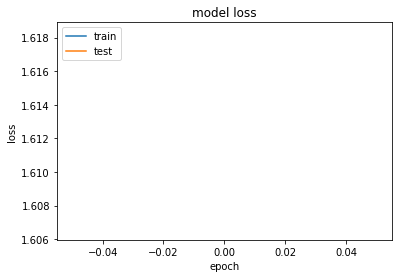

In [52]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy LSTM')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()